# **GAN For Audio Data**

In [1]:
# !pip install librosa


## **Importing Libraries**

In [2]:
import os
import json
import librosa
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## **Extracting Data**

In [9]:
# Define input and output directories
input_dir = "AudioMNIST/data"
output_dir = "AudioMNIST/preprocessed_data"

In [10]:
# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [11]:
MAX_LENGTH = 47998

In [12]:
# Define function to load audio files and save as numpy arrays
def process_dataset(input_dir, output_dir, metadata_path):
    metadata = pd.read_csv(metadata_path, index_col=0)    
    for root, dirs, files in os.walk(input_dir):
        # print(dirs)
        # print(files)
        for filename in files:
            if filename.endswith(".wav"):
                # Load audio file
                # print("Present")
                audio_path = os.path.join(root, filename)
                label, subfolder_index, data_index = filename.split("_")
                label = int(label)
                subfolder_index = int(subfolder_index)
                data_index = int(data_index.split(".")[0])
                y, sr = librosa.load(audio_path, sr=None)
                
                # Calculate the amount of padding needed on each side
                padding_left = (MAX_LENGTH - len(y)) // 2
                padding_right = MAX_LENGTH - len(y) - padding_left

                # Pad the array on both sides
                y = np.pad(y, (padding_left, padding_right), mode='constant')
                
                # Filter the DataFrame based on the specified column value
                filtered_meta = metadata[metadata["index"] == int(subfolder_index)].values
                
                # Perform feature extraction (e.g., Mel spectrogram)
                mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
                mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
                
                # Save audio data as numpy array
                np.savez(file=os.path.join(output_dir, f"{label}_{subfolder_index}_{data_index}.npz"),
                         metadata=filtered_meta,
                         audio=y,
                         mel_spec=mel_spec,
                         mel_spec_db=mel_spec_db)


In [13]:
# Process the dataset
process_dataset(input_dir, output_dir, metadata_path="AudioMNIST/data/metadata.csv")

### **Understanding the Data**

In [4]:
data_file1 = "./AudioMNIST/preprocessed_data/0_1_0.npz"
data_file2 = "./AudioMNIST/preprocessed_data/1_1_0.npz"
data_file3 = "./AudioMNIST/preprocessed_data/9_1_0.npz"

In [7]:
# Load the .npy file
audio_data2 = np.load(data_file1)
audio_data1 = np.load(data_file2)

In [8]:
metadata2 = audio_data2["metadata"]
audio2 = audio_data2["audio"]
mel_spec2 = audio_data2["mel_spec"]
mel_spec_db2 = audio_data2["mel_spec_db"]

In [9]:
metadata2

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1.]])

In [10]:
audio2.shape

(47998,)

In [11]:
mel_spec_db2.shape

(128, 94)

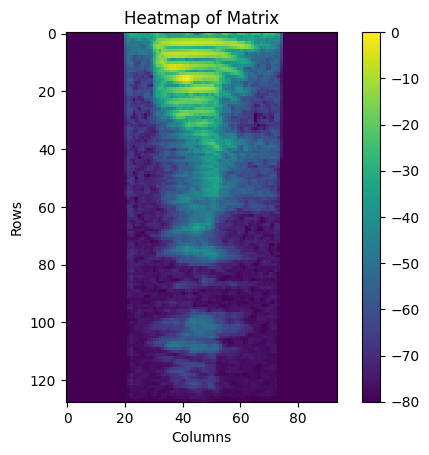

In [13]:
# Plot heatmap
plt.imshow(mel_spec_db2, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add color bar
plt.title('Heatmap of Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


### **Understanding the Audio**

In [14]:
from IPython.display import Audio

In [17]:
# Path to the .wav file you want to play
wav_file_path = "AudioMNIST/data/09/4_09_2.wav"


In [18]:
# This should say "Three"
Audio(wav_file_path)

### **Understanding the MetaData**

In [3]:
# Read the .txt file and convert it to a list of dictionaries
with open('data/audiomnist/audioMNIST_meta.json', 'r') as file:
    metadata = json.load(file)

In [4]:
list_of_dicts = []


In [5]:
# Iterate over the items of the original dictionary
for key, value in metadata.items():
    # Add the key as a new field 'index'
    value['index'] = key
    # Append the modified dictionary to the list
    list_of_dicts.append(value)
    

In [6]:
metadata_df = pd.DataFrame(list_of_dicts)

In [7]:
metadata_df["continent"] = metadata_df["origin"].apply(lambda x: x.split(",")[0].strip())
metadata_df["country"] = metadata_df["origin"].apply(lambda x: x.split(",")[1].strip())
metadata_df["state"] = metadata_df["origin"].apply(lambda x: x.split(",")[2].strip())

In [8]:
metadata_df = metadata_df.drop(["origin"], axis=1)

In [9]:
metadata_df

,accent,age,gender,native speaker,recordingdate,recordingroom,index,continent,country,state
0,german,30,male,no,17-06-22-11-04-28,Kino,01,Europe,Germany,Wuerzburg
1,German,25,male,no,17-06-26-17-57-29,Kino,02,Europe,Germany,Hamburg
2,German,31,male,no,17-06-30-17-34-51,Kino,03,Europe,Germany,Bremen
3,German,23,male,no,17-06-30-18-09-14,Kino,04,Europe,Germany,Helmstedt
4,German,25,male,no,17-07-06-10-53-10,Kino,05,Europe,Germany,Hameln
5,German,25,male,no,17-07-06-11-23-34,Kino,06,Europe,Germany,Dortmund
6,German/Spanish,27,male,no,17-07-10-17-06-17,Kino,07,Europe,Spanien,Mallorca
7,German,41,male,no,17-07-10-17-39-41,Kino,08,Europe,Germany,Ludwigsfelde
8,South Korean,35,male,no,17-07-12-17-03-59,Kino,09,Asia,South Korea,Seoul
9,German,36,male,no,17-07-12-17-31-43,Kino,10,Europe,Germany,Lemgo


In [10]:
def datetime_to_timestamp(datetime_str):
    # Convert the datetime string to a datetime object
    datetime_obj = datetime.strptime(datetime_str, "%y-%m-%d-%H-%M-%S")

    # Convert the datetime object to a timestamp
    timestamp = datetime_obj.timestamp()
    
    return timestamp

In [11]:
metadata_df['recordingdate'] = metadata_df["recordingdate"].apply(datetime_to_timestamp)

In [12]:
metadata_df.head()

,accent,age,gender,native speaker,recordingdate,recordingroom,index,continent,country,state
0,german,30,male,no,1.498110e+09,Kino,01,Europe,Germany,Wuerzburg
1,German,25,male,no,1.498480e+09,Kino,02,Europe,Germany,Hamburg
2,German,31,male,no,1.498824e+09,Kino,03,Europe,Germany,Bremen
3,German,23,male,no,1.498826e+09,Kino,04,Europe,Germany,Helmstedt
4,German,25,male,no,1.499319e+09,Kino,05,Europe,Germany,Hameln


In [13]:
def make_age_group(age):
    age = int(age)
    if age < 15:
        group = 0
    elif 15 <= age < 20:
        group = 1
    elif 20 <= age < 30:
        group = 2
    elif 30 <= age < 50:
        group = 3
    else:
        group = 4
    return group
    

In [14]:
metadata_df["age"] = metadata_df["age"].apply(make_age_group)

In [15]:
categorical_columns = ["age", "accent", "gender", "native speaker", "recordingroom", "index", "continent", "country", "state"]

In [16]:
# One-hot encode categorical columns
metadata_df_encoded = pd.get_dummies(metadata_df, columns=categorical_columns)


In [17]:
metadata_df_encoded["recordingdate"] = (metadata_df_encoded["recordingdate"] - metadata_df_encoded["recordingdate"].min()) / (metadata_df_encoded["recordingdate"].max() - metadata_df_encoded["recordingdate"].min())

In [18]:
metadata_df_encoded["index"] = metadata_df["index"].astype("int64")

In [20]:
metadata_df_encoded.to_csv("data/audiomnist/metadata.csv")

### **Formating the Data**

In [161]:
import torch
import librosa
from torch.utils.data import Dataset, DataLoader

In [162]:
class AudioMNISTDataset(Dataset):
    def __init__(self, data_path):
        self.data_path = data_path
        self.file_list = os.listdir(self.data_path)
        
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        file_name = os.path.join(self.data_path, self.file_list[idx])
        data = np.load(file_name)
        
        # print(self.file_list[idx])
        label, subfolder_index, data_index = self.file_list[idx].split("_")
        
        # Extracting data
        metadata = audio_data2["metadata"]
        audio = audio_data2["audio"]
        mel_spec = audio_data2["mel_spec"]
        mel_spec_db = audio_data2["mel_spec_db"]

        # Assuming your data is a numpy array, you can convert it to a PyTorch tensor
        tensor_audio = torch.from_numpy(audio).reshape(-1, 1)
        tensor_meta = torch.tensor(metadata).reshape(-1, 1)
        tensor_mel_spec = torch.tensor(mel_spec)
        tensor_mel_spec_db = torch.tensor(mel_spec_db)
        return tensor_audio, tensor_meta, tensor_mel_spec, tensor_mel_spec_db


In [167]:
dataset = AudioMNISTDataset(data_path="./AudioMNIST/preprocessed_data")

In [166]:
# Create a DataLoader for batching and shuffling
batch_size = 32
shuffle = True

In [168]:
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

## **Model Development**

In [173]:
import torch.nn as nn
import torch.optim as optim

In [174]:
class Generator(nn.Module):
    def __init__(self, input_size, metadata_size, output_size):
        super(Generator, self).__init__()
        self.input_size = input_size
        self.metadata_size = metadata_size
        self.output_size = output_size

        # Generator layers
        self.fc1 = nn.Linear(input_size + metadata_size, 8)
        self.fc2 = nn.Linear(8, 16)
        self.fc3 = nn.Linear(16, output_size)

    def forward(self, noise, metadata):
        x = torch.cat((noise, metadata), dim=1)  # Concatenate noise and metadata
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))  # Tanh activation for audio output
        return x

In [175]:
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.input_size = input_size

        # Discriminator layers
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, audio):
        # x = torch.cat((audio, metadata), dim=1)  # Concatenate audio and metadata
        x = audio
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

In [194]:
def train_gan(generator, discriminator, dataloader, num_epochs, generator_optimizer, discriminator_optimizer, criterion):
    for epoch in range(num_epochs):
        for i, (metadata, real_audio) in enumerate(dataloader):
            # Generate fake audio
            noise = torch.randn(metadata.size(0), generator.input_size, device=device)
            fake_audio = generator(noise, metadata)

            # Train discriminator
            discriminator_optimizer.zero_grad()
            real_output = discriminator(real_audio)
            fake_output = discriminator(fake_audio.detach())
            real_loss = criterion(real_output, torch.ones_like(real_output))
            fake_loss = criterion(fake_output, torch.zeros_like(fake_output))
            discriminator_loss = (real_loss + fake_loss) / 2
            discriminator_loss.backward()
            discriminator_optimizer.step()

            # Train generator
            generator_optimizer.zero_grad()
            fake_output = discriminator(fake_audio)
            generator_loss = criterion(fake_output, torch.ones_like(fake_output))
            generator_loss.backward()
            generator_optimizer.step()

            # Print progress
            if (i+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], '
                      f'D_loss: {discriminator_loss.item():.4f}, G_loss: {generator_loss.item():.4f}')


In [195]:
# Define hyperparameters
input_size = 8  # Size of input noise vector
metadata_size = 5  # Size of metadata array
output_size = 100  # Size of output audio vector
num_epochs = 100
batch_size = 64
learning_rate = 0.0002
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [196]:
# Dummy data loader (replace with your actual data loader)
metadata_tensor = torch.randn(batch_size, metadata_size).to(device)
audio_tensor = torch.randn(batch_size, output_size).to(device)
dataloader = [(metadata_tensor, audio_tensor)] * 100  # Dummy data loader for demonstration


In [197]:
# Initialize models
generator = Generator(input_size, metadata_size, output_size).to(device)
discriminator = Discriminator(output_size).to(device)


In [198]:
# Initialize loss criterion
criterion = nn.BCELoss()

# Initialize optimizers
generator_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)


In [199]:
# Train GAN
train_gan(generator, discriminator, dataloader, num_epochs, generator_optimizer, discriminator_optimizer, criterion)

Epoch [1/100], Step [10/100], D_loss: 0.6902, G_loss: 0.8346
Epoch [1/100], Step [20/100], D_loss: 0.6852, G_loss: 0.8341
Epoch [1/100], Step [30/100], D_loss: 0.6800, G_loss: 0.8336
Epoch [1/100], Step [40/100], D_loss: 0.6745, G_loss: 0.8335
Epoch [1/100], Step [50/100], D_loss: 0.6685, G_loss: 0.8343
Epoch [1/100], Step [60/100], D_loss: 0.6625, G_loss: 0.8342
Epoch [1/100], Step [70/100], D_loss: 0.6564, G_loss: 0.8338
Epoch [1/100], Step [80/100], D_loss: 0.6496, G_loss: 0.8341
Epoch [1/100], Step [90/100], D_loss: 0.6428, G_loss: 0.8342
Epoch [1/100], Step [100/100], D_loss: 0.6357, G_loss: 0.8342
Epoch [2/100], Step [10/100], D_loss: 0.6281, G_loss: 0.8349
Epoch [2/100], Step [20/100], D_loss: 0.6211, G_loss: 0.8332
Epoch [2/100], Step [30/100], D_loss: 0.6133, G_loss: 0.8329
Epoch [2/100], Step [40/100], D_loss: 0.6052, G_loss: 0.8321
Epoch [2/100], Step [50/100], D_loss: 0.5976, G_loss: 0.8286
Epoch [2/100], Step [60/100], D_loss: 0.5885, G_loss: 0.8280
Epoch [2/100], Step [70